In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_training_stats(encoding_method, graph_type, num_segments=None):
    model_params = "encoding={},graph_type={},node_normalization".format(encoding_method, graph_type)
    if num_segments:
        model_params = model_params + "{}_num_segments".format(num_segments)
    results_dir = os.path.join(results_base_path, model_params)

    training_stats = pd.read_csv(os.path.join(results_dir, "training_stats.csv"), index_col=0)
    training_stats.set_index("Epoch", inplace=True)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    ax = sns.lineplot(data=training_stats.train_loss, color="g", ax=ax)
    ax.legend(["Training Loss"], loc="upper left")
    ax2 = ax.twinx()
    sns.lineplot(data=training_stats.test_f1_score, color="b", ax=ax2)
    ax2.legend(["Test F1 score"], loc="upper right")
    title = "{}, {} graph".format(encoding_method, graph_type)
    if num_segments:
        title = title + ", {}_num_segments".format(num_segments)
    fig.suptitle(title)

results_base_path = "C:/Users/results/gnn_flood_detection/"

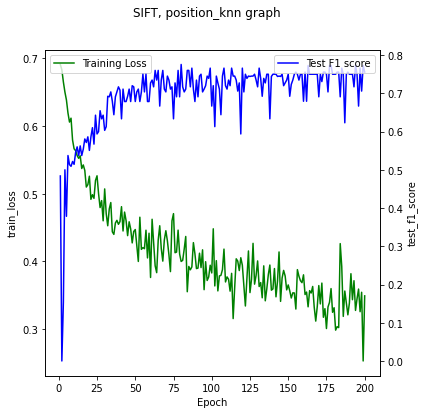

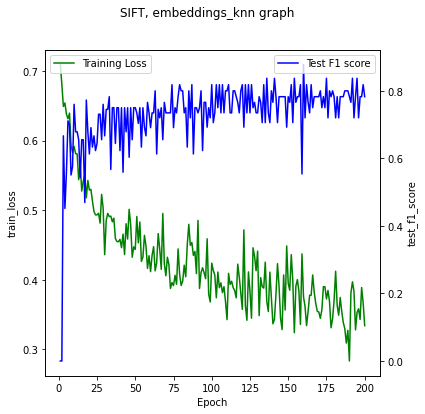

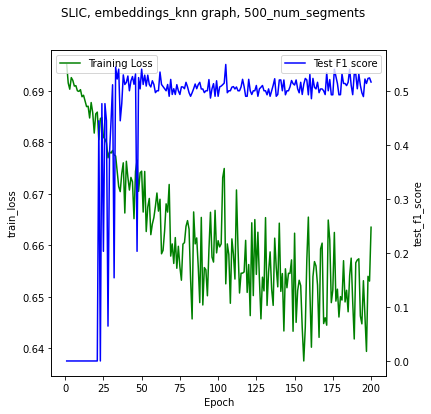

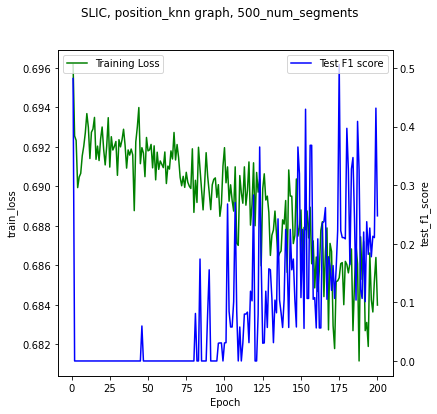

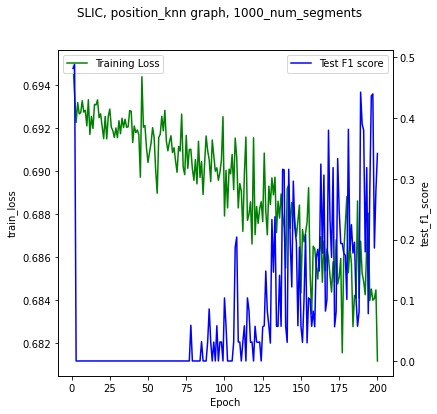

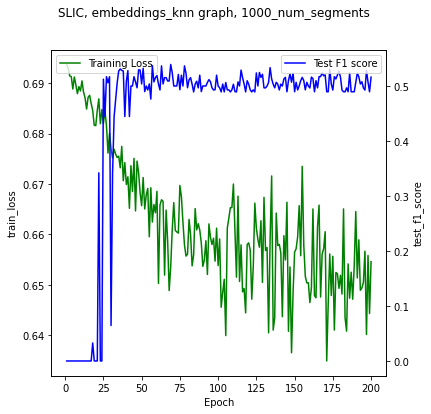

In [39]:
visualize_training_stats("SIFT", "position_knn")
visualize_training_stats("SIFT", "embeddings_knn")
visualize_training_stats("SLIC", "embeddings_knn", 500)
visualize_training_stats("SLIC", "position_knn", 500)
visualize_training_stats("SLIC", "position_knn", 1000)
visualize_training_stats("SLIC", "embeddings_knn", 1000)

Text(0.5, 0.98, 'SIFT, position_knn')

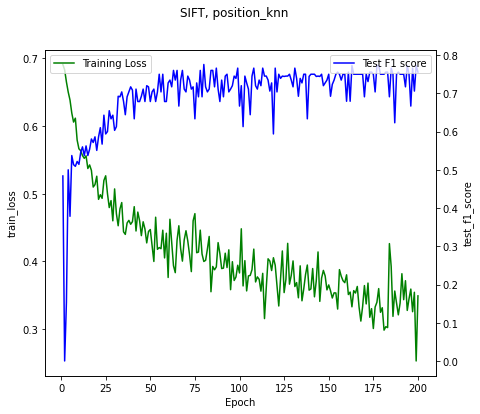